In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cactas as C

In [3]:
import tensorflow as tf
gpu_available = tf.test.is_gpu_available()
gpu_available

2023-09-21 20:39:42.791951: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2023-09-21 20:39:45.655933: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-21 20:39:45.657212: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-09-21 20:39:46.114236: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:87:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-09-21 20:39:46.116746: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:90:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 3

True

In [4]:
DATAPATH='/raid/mpsych/CACTAS/DATA/ESUS'

In [5]:
images, labels = C.Helper.load_data(DATAPATH)

In [6]:
X_train, y_train, X_test, y_test = C.Helper.split_patients(images, labels)

In [7]:
X_train, y_train, X_test, y_test = C.Helper.normalization(DATAPATH, X_train, y_train, X_test, y_test)

In [8]:
X_train, y_train, X_test, y_test = C.Helper.extract_slices(X_train, y_train, X_test, y_test)

(13491, 512, 512, 1) (13491, 512, 512, 1) (3275, 512, 512, 1) (3275, 512, 512, 1)


In [9]:
X_train, y_train, X_test, y_test = C.Helper.filter_slices(X_train, y_train, X_test, y_test)

(555, 512, 512, 1) (555, 512, 512, 1) (159, 512, 512, 1) (159, 512, 512, 1)


In [10]:
train_gen = C.Helper.augment(X_train, y_train)

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [11]:
model = C.Helper.create_unet(X_train[0].shape)

2023-09-21 20:42:17.807660: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:87:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-09-21 20:42:17.810175: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:90:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-09-21 20:42:17.820045: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0, 1
2023-09-21 20:42:17.823090: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:87:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-09-21 20:42:17.825547: I tensorflow/core

In [12]:
model, history = C.Helper.train_unet(train_gen, X_train, y_train, X_test, y_test, model, epochs=200)

2023-09-21 20:42:19.110389: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-09-21 20:42:19.128808: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245800000 Hz


Epoch 1/200


2023-09-21 20:42:20.329473: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-09-21 20:42:21.062391: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-09-21 20:42:21.842981: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-09-21 20:42:21.843007: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-09-21 20:42:21.843063: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-09-21 20:42:22.878748: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-09-21 20:42:23.601855: I tensorflow/stream_exec

18/18 [==============================] - 164s 6s/step - loss: 0.2964 - iou: 1.8793e-04 - iou_thresholded: 7.3413e-04 - val_loss: 0.0049 - val_iou: 4.0160e-04 - val_iou_thresholded: 9.5561e-04
Epoch 2/200
18/18 [==============================] - 18s 983ms/step - loss: 0.0041 - iou: 4.0466e-04 - iou_thresholded: 7.4351e-04 - val_loss: 0.0022 - val_iou: 3.4432e-04 - val_iou_thresholded: 9.5561e-04
Epoch 3/200
18/18 [==============================] - 18s 978ms/step - loss: 0.0021 - iou: 4.2569e-04 - iou_thresholded: 7.5973e-04 - val_loss: 0.0013 - val_iou: 5.0680e-04 - val_iou_thresholded: 9.5561e-04
Epoch 4/200
18/18 [==============================] - 18s 980ms/step - loss: 0.0018 - iou: 4.9866e-04 - iou_thresholded: 7.4695e-04 - val_loss: 0.0013 - val_iou: 6.2857e-04 - val_iou_thresholded: 9.5561e-04
Epoch 5/200
18/18 [==============================] - 18s 978ms/step - loss: 0.0017 - iou: 6.3550e-04 - iou_thresholded: 8.7818e-04 - val_loss: 0.0011 - val_iou: 9.0626e-04 - val_iou_threshol

Epoch 42/200
18/18 [==============================] - 18s 983ms/step - loss: 3.0607e-04 - iou: 0.4060 - iou_thresholded: 0.5363 - val_loss: 4.6583e-04 - val_iou: 0.3009 - val_iou_thresholded: 0.3242
Epoch 43/200
18/18 [==============================] - 18s 976ms/step - loss: 3.1004e-04 - iou: 0.4002 - iou_thresholded: 0.5145 - val_loss: 3.7535e-04 - val_iou: 0.3179 - val_iou_thresholded: 0.4145
Epoch 44/200
18/18 [==============================] - 18s 978ms/step - loss: 2.8829e-04 - iou: 0.4196 - iou_thresholded: 0.5534 - val_loss: 4.3209e-04 - val_iou: 0.3370 - val_iou_thresholded: 0.3921
Epoch 45/200
18/18 [==============================] - 18s 979ms/step - loss: 2.9633e-04 - iou: 0.4232 - iou_thresholded: 0.5379 - val_loss: 5.4527e-04 - val_iou: 0.2946 - val_iou_thresholded: 0.3277
Epoch 46/200
18/18 [==============================] - 18s 975ms/step - loss: 3.3525e-04 - iou: 0.3967 - iou_thresholded: 0.5102 - val_loss: 4.2990e-04 - val_iou: 0.2781 - val_iou_thresholded: 0.3531
Epoch

18/18 [==============================] - 18s 978ms/step - loss: 1.5329e-04 - iou: 0.6191 - iou_thresholded: 0.7172 - val_loss: 9.2900e-04 - val_iou: 0.3173 - val_iou_thresholded: 0.3707
Epoch 84/200
18/18 [==============================] - 18s 979ms/step - loss: 1.5788e-04 - iou: 0.6055 - iou_thresholded: 0.7065 - val_loss: 8.8173e-04 - val_iou: 0.3063 - val_iou_thresholded: 0.3579
Epoch 85/200
18/18 [==============================] - 18s 975ms/step - loss: 1.5404e-04 - iou: 0.6157 - iou_thresholded: 0.7159 - val_loss: 7.6371e-04 - val_iou: 0.3390 - val_iou_thresholded: 0.3940
Epoch 86/200
18/18 [==============================] - 18s 979ms/step - loss: 1.4673e-04 - iou: 0.6295 - iou_thresholded: 0.7280 - val_loss: 7.4867e-04 - val_iou: 0.3398 - val_iou_thresholded: 0.3986
Epoch 87/200
18/18 [==============================] - 18s 975ms/step - loss: 1.4594e-04 - iou: 0.6298 - iou_thresholded: 0.7271 - val_loss: 8.1235e-04 - val_iou: 0.3398 - val_iou_thresholded: 0.3754
Epoch 88/200
18/18

18/18 [==============================] - 18s 975ms/step - loss: 1.3819e-04 - iou: 0.6311 - iou_thresholded: 0.7325 - val_loss: 6.0507e-04 - val_iou: 0.3460 - val_iou_thresholded: 0.3968
Epoch 125/200
18/18 [==============================] - 18s 980ms/step - loss: 1.3113e-04 - iou: 0.6458 - iou_thresholded: 0.7424 - val_loss: 6.9453e-04 - val_iou: 0.3607 - val_iou_thresholded: 0.4029
Epoch 126/200
18/18 [==============================] - 18s 979ms/step - loss: 1.3051e-04 - iou: 0.6539 - iou_thresholded: 0.7502 - val_loss: 7.7795e-04 - val_iou: 0.3389 - val_iou_thresholded: 0.3692
Epoch 127/200
18/18 [==============================] - 18s 979ms/step - loss: 1.2132e-04 - iou: 0.6680 - iou_thresholded: 0.7579 - val_loss: 7.5236e-04 - val_iou: 0.3432 - val_iou_thresholded: 0.3895
Epoch 128/200
18/18 [==============================] - 18s 983ms/step - loss: 1.2064e-04 - iou: 0.6722 - iou_thresholded: 0.7572 - val_loss: 9.1801e-04 - val_iou: 0.3431 - val_iou_thresholded: 0.3707
Epoch 129/200


18/18 [==============================] - 18s 980ms/step - loss: 7.7551e-05 - iou: 0.7677 - iou_thresholded: 0.8346 - val_loss: 0.0012 - val_iou: 0.3606 - val_iou_thresholded: 0.3762
Epoch 166/200
18/18 [==============================] - 18s 981ms/step - loss: 7.6105e-05 - iou: 0.7710 - iou_thresholded: 0.8378 - val_loss: 0.0011 - val_iou: 0.3806 - val_iou_thresholded: 0.3980
Epoch 167/200
18/18 [==============================] - 18s 980ms/step - loss: 7.5730e-05 - iou: 0.7738 - iou_thresholded: 0.8398 - val_loss: 0.0011 - val_iou: 0.3819 - val_iou_thresholded: 0.4028
Epoch 168/200
18/18 [==============================] - 18s 981ms/step - loss: 7.5349e-05 - iou: 0.7743 - iou_thresholded: 0.8373 - val_loss: 0.0014 - val_iou: 0.3592 - val_iou_thresholded: 0.3728
Epoch 169/200
18/18 [==============================] - 18s 981ms/step - loss: 7.5723e-05 - iou: 0.7727 - iou_thresholded: 0.8398 - val_loss: 0.0013 - val_iou: 0.3661 - val_iou_thresholded: 0.3797
Epoch 170/200
18/18 [=============

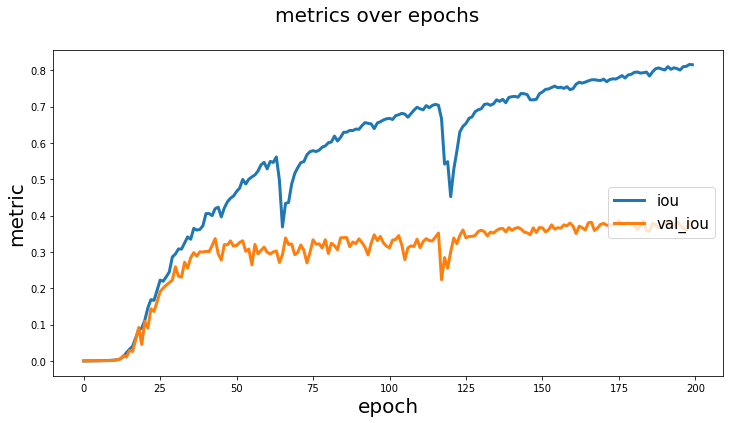

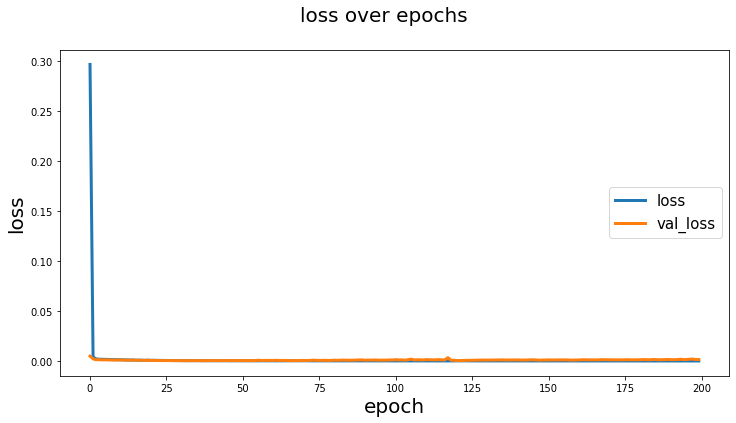

In [13]:
C.Helper.visualize_graph(history)

In [14]:
y_pred = C.Helper.prediction(X_test, model)

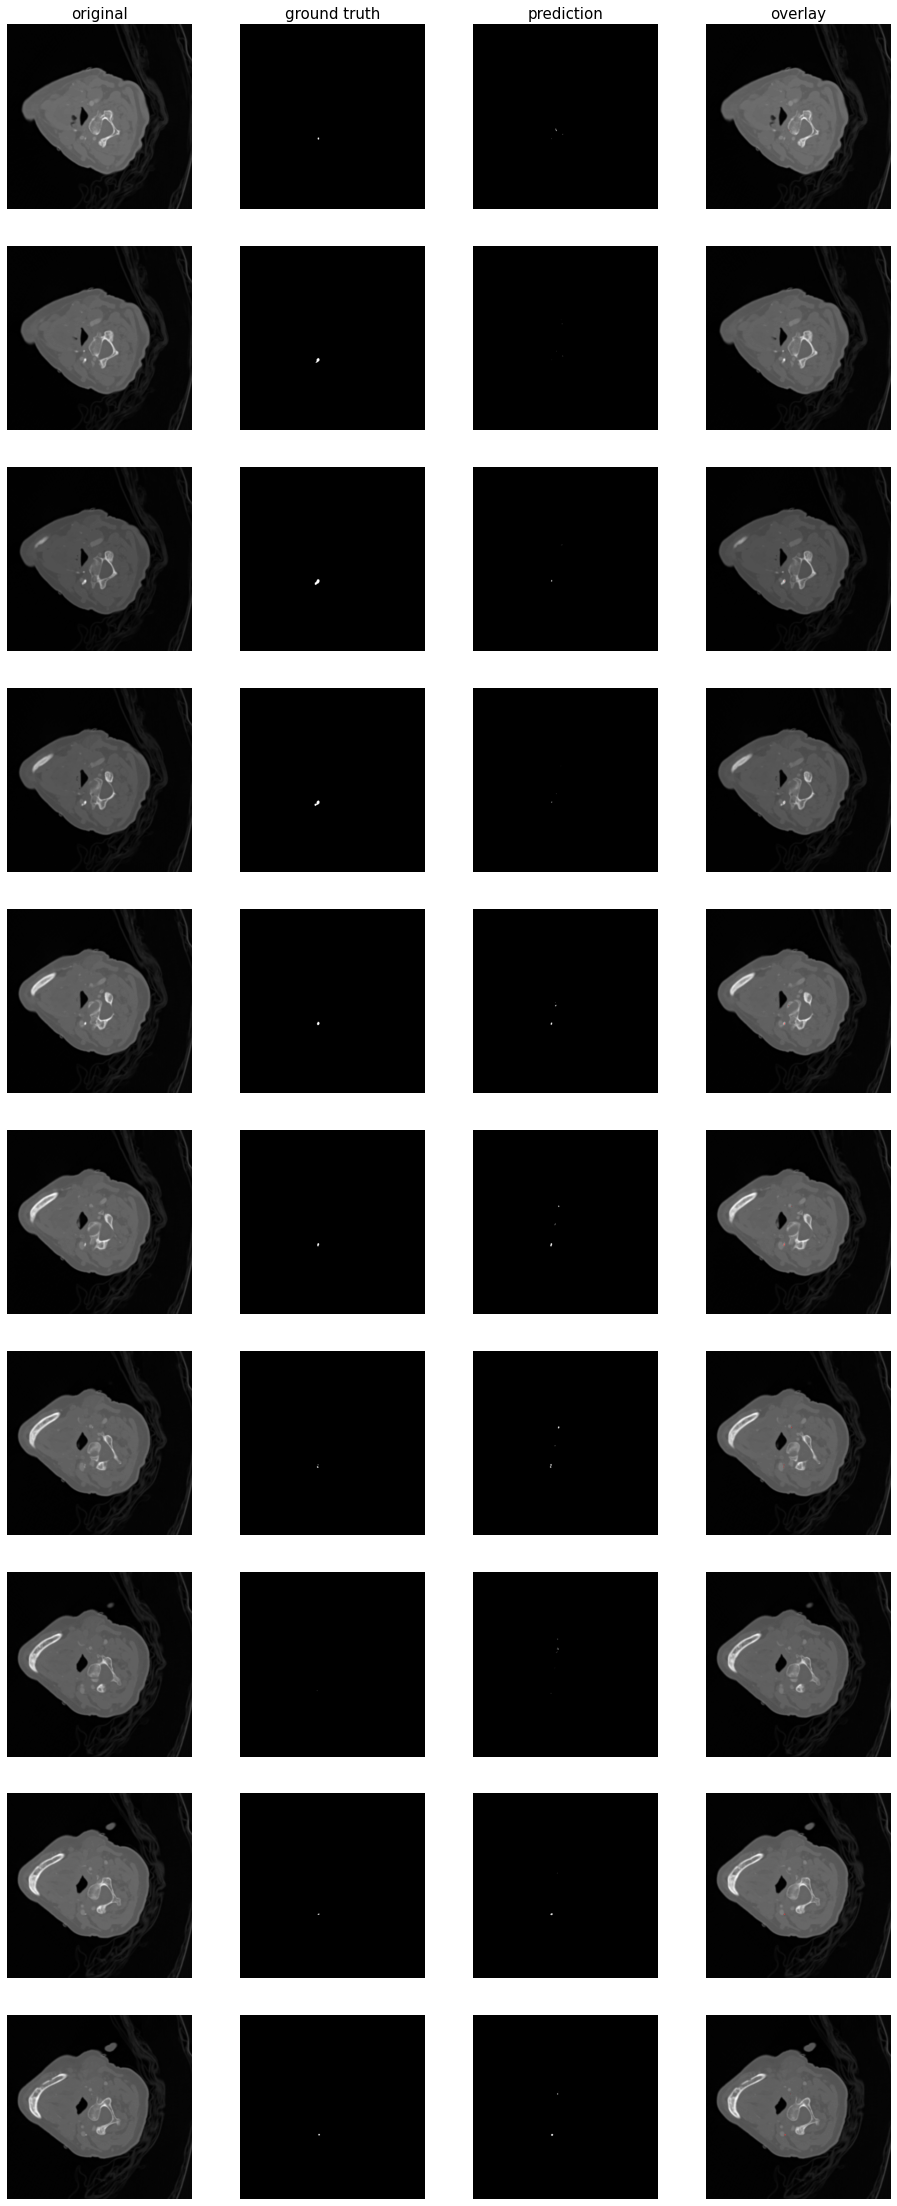

In [15]:
C.Helper.visualize_result(X_test, y_test, y_pred)

In [16]:
C.Helper.evaluate(X_test, y_test, model)

5/5 [==============================] - 1s 214ms/step - loss: 0.0015 - iou: 0.3660 - iou_thresholded: 0.3788
